In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Read Foreground Image

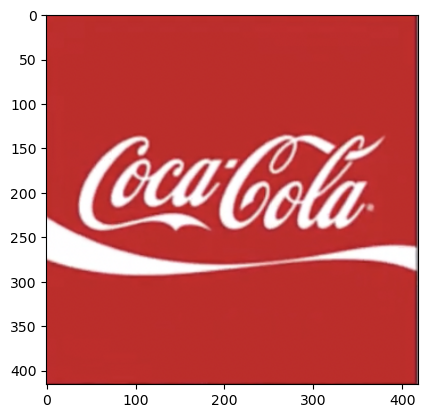

In [9]:
pt = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/color/logo.png'
img1 = cv2.imread(pt,cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [10]:
img1.shape

(416, 418, 3)

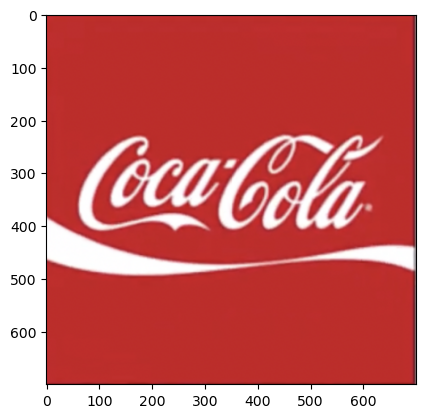

In [11]:
img1 = cv2.resize(img1,dsize=(700,700),interpolation=cv2.INTER_AREA)
plt.imshow(img1)

In [12]:
img1.shape

(700, 700, 3)

## Read Background Image

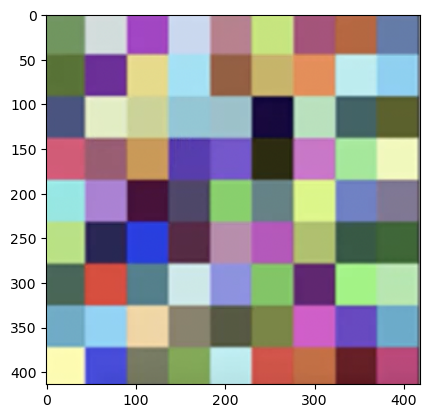

In [39]:
pt = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/color/checkerboard.png'
img2 = cv2.imread(pt,cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [40]:
img2.shape

(414, 418, 3)

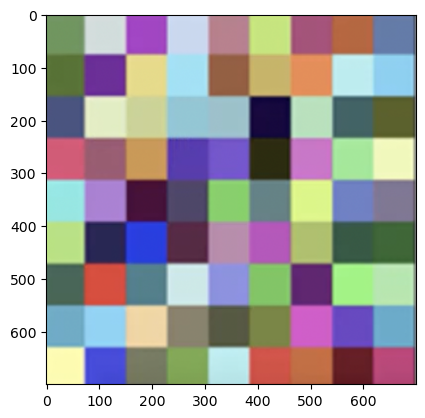

In [41]:
img2 = cv2.resize(img2,dsize=(700,700),interpolation=cv2.INTER_AREA)
plt.imshow(img2)

## Create Mask

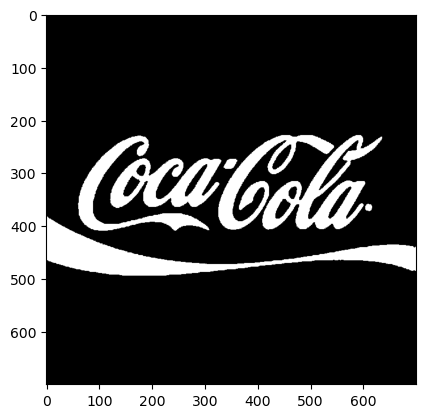

In [31]:
img1_gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
retval, img1_mask = cv2.threshold(img1_gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(img1_mask,cmap='gray')

## Invert the Mask

_Keep those regions black where we want to apply a background image_

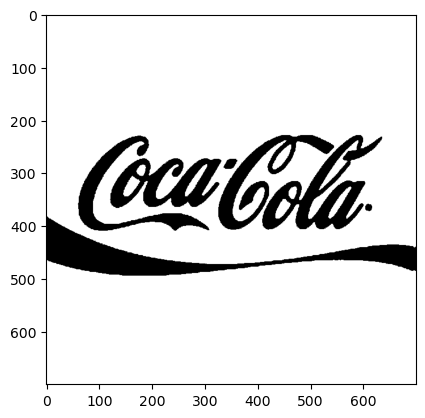

In [33]:
img1_mask_inv = cv2.bitwise_not(img1_mask)
plt.imshow(img1_mask_inv,cmap='gray')

In [36]:
img1_mask_inv.shape,img2.shape

((700, 700), (700, 700, 3))

## Apply Background on the Logo Letters

_Color background will show through the mask only where the mask pixels are white_

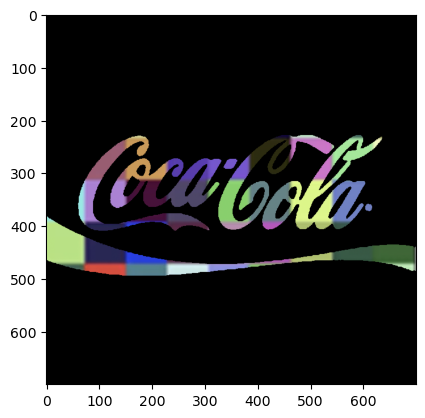

In [49]:
img2_background = cv2.bitwise_and(img2,img2,mask=img1_mask)
plt.imshow(img2_background)

## Isolate Logo letters from Original Image

_Image will show only where the mask pixel is white_

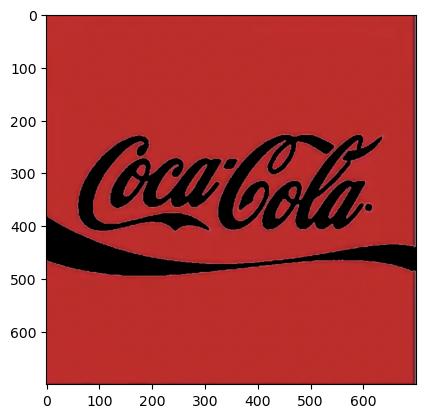

In [48]:
img1_foreground = cv2.bitwise_and(img1,img1,mask=img1_mask_inv)
plt.imshow(img1_foreground)

## Merge background and foregound

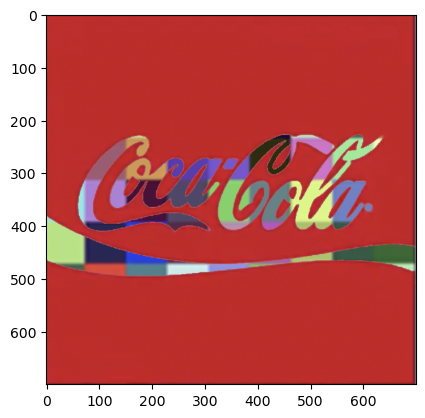

In [50]:
img_final = cv2.bitwise_or(img1_foreground,img2_background,mask=None)
plt.imshow(img_final)